In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np

In [10]:
# Discretizamos el espacio
Xmin, Xmax, NpointsX = 0.,40.,51
Ymin, Ymax, NpointsY = 0.,40.,51

x = np.linspace(Xmin,Xmax,NpointsX)
y = np.linspace(Xmin,Xmax,NpointsY)

In [11]:
def h1(y):
    return 75.

def h2(y):
    return 50.

def h3(x):
    return 100.

def h4(x):
    return 10.

def InitT():
    
    T = np.zeros( (NpointsX,NpointsY) )
    
    # Fijando las fronteras
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T


def GetRelaxation(T, omega, Nit = int(1e5), tolerancia = 1e-2):
    
    itmax = 0
    
    for it in (range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                r = (tmp - T[i,j]) # Calculo la distancia entre j y j-1
                
                T[i,j] += omega*r # Actualizar la matriz
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return T,itmax

[]


C:\Users\Eduardo\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

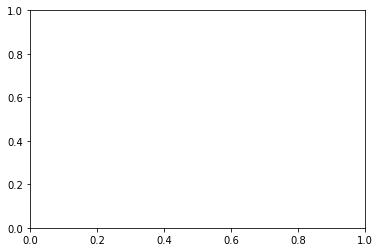

In [23]:

T = InitT()
muestra = 10
omegas = np.linspace(1., 1.95, muestra)
#iteraciones = np.empty()
iteraciones = []
print(iteraciones)

for omega in omegas:
    it = GetRelaxation(T, omega)
    #iteraciones.insert(it)
    iteraciones.append(it)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(omegas, iteraciones)
plt.show()